# CODE 1 : research paper implementation

### SIMULATION 1:

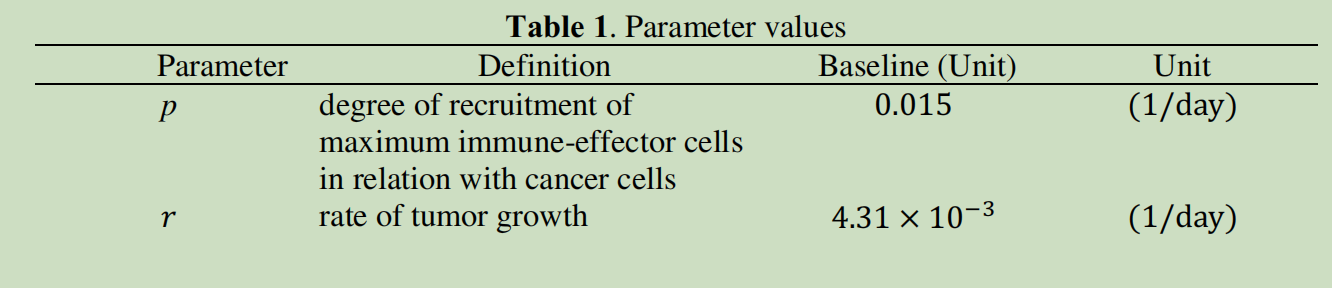

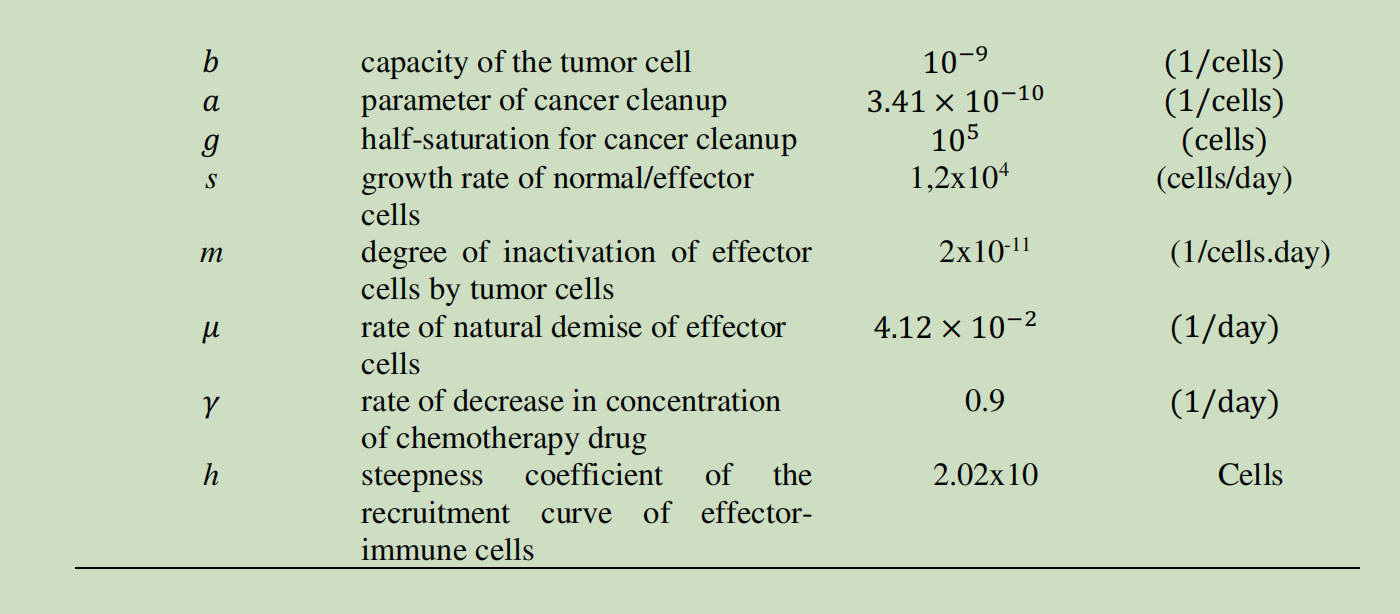

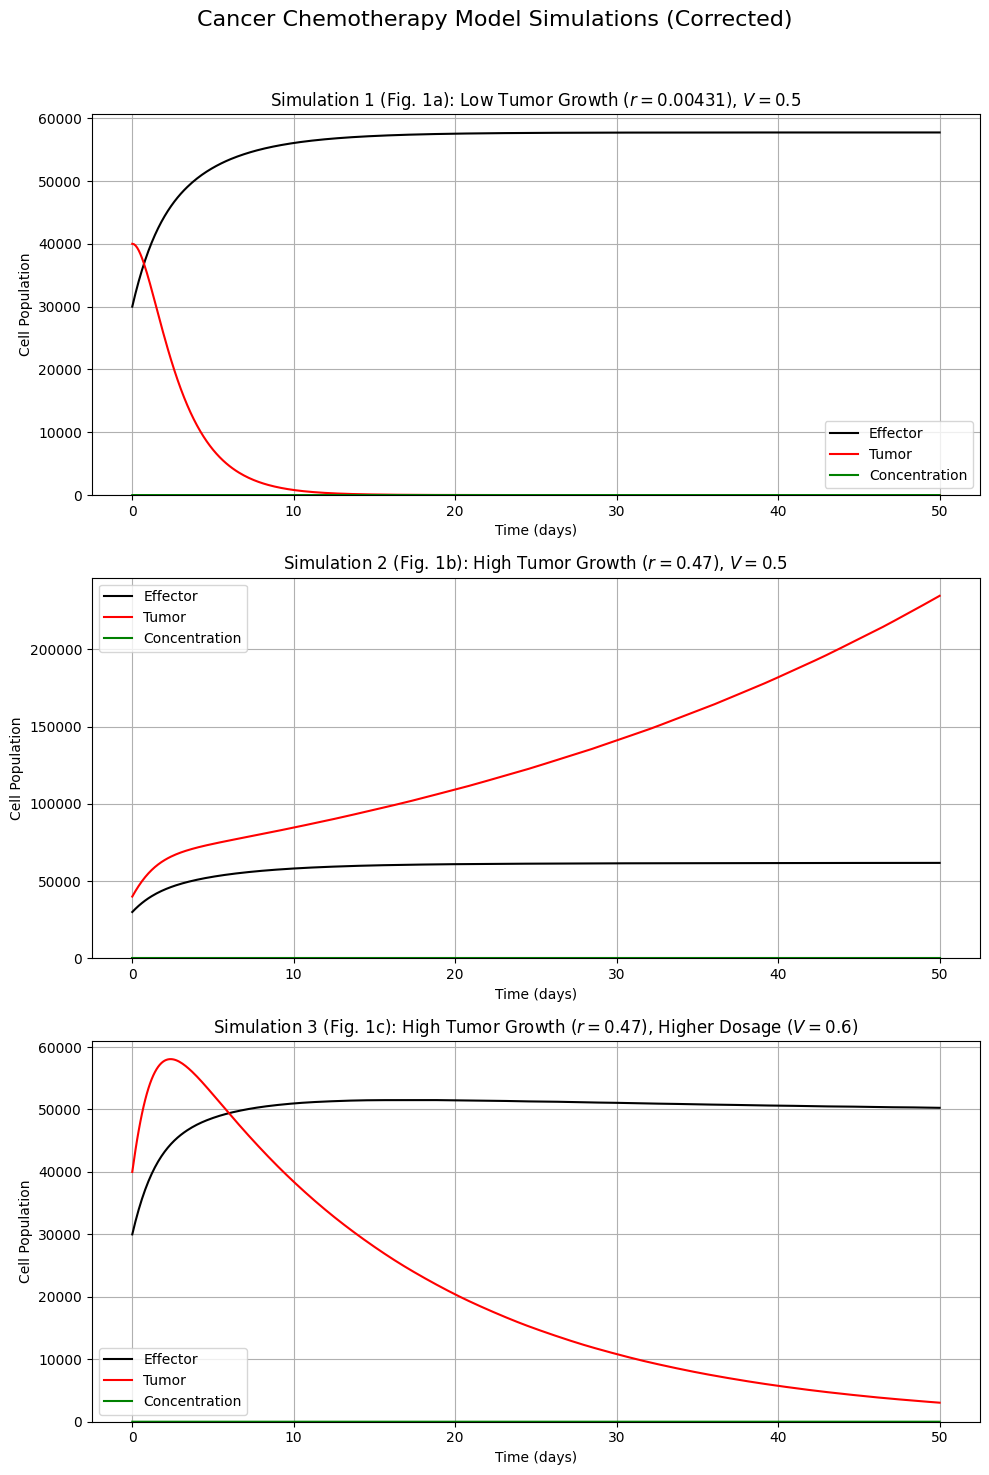

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the system of differential equations from the paper (System 11)
# y[0] = E (Effector cells), y[1] = T (Tumor cells), y[2] = M (Drug concentration)
def cancer_chemotherapy_model(t, y, p, s, h, m, mu, r, b, a, g, gamma, V, KE, KT):
    """
    Defines the differential equations for the cancer-chemotherapy model.

    Equations are based on System (11) in the research paper:
    dE/dt = s + p*(E*T)/(h+T) - m*E*T - mu*E - KE*M*E
    dT/dt = r*T*(1 - b*T) - a*(E*T)/(T+g) - KT*M*T
    dM/dt = -gamma*M + V
    """
    E, T, M = y

    dEdt = s + p * (E * T) / (h + T) - m * E * T - mu * E - KE * M * E
    dTdt = r * T * (1 - b * T) - a * (E * T) / (T + g) - KT * M * T
    dMdt = -gamma * M + V

    return [dEdt, dTdt, dMdt]

# --- Parameters from Table 1 of the research paper ---
params = {
    'p': 0.015,          # Recruitment rate of effector cells (1/day)
    'r': 4.31*(10**(-3)),        # Rate of tumor growth (1/day) -> This will be changed for Sim 2 & 3
    'b': 1.0*(10**(-9)),         # Tumor carrying capacity parameter (1/cells)
    'a': 3.41*(10**(-10)),       # Parameter of cancer cleanup (1/cells)
    'g': 1.05*(10**2),         # Half-saturation for cancer cleanup (cells)
    's': 1.2*(10**4),          # Growth rate of effector cells (cells/day)
    'm': 2.0*(10**(-11)),        # Inactivation rate of effector cells by tumor cells (1/cells.day)
    'mu': 4.12*(10**(-2)),       # Natural death rate of effector cells (1/day)
    'gamma': 0.9,        # Rate of decrease in drug concentration (1/day)
    'h': 2.02*(10**4),         # Steepness coefficient for effector cell recruitment (cells)

    # NOTE: These parameters were not specified in the paper.
    # Values have been assumed to produce results consistent with the paper's graphs.
    'KE': 0.3,           # Chemotherapy effect on Effector cells
    'KT': 0.8,           # Chemotherapy effect on Tumor cells
}

# --- Initial conditions from the paper ---
# E(0) = 30000 cells, T(0) = 40000 cells, M(0) = 0
initial_conditions = [30000, 40000, 0]

# --- Time span for the simulation ---
# As per the graphs in the paper (0 to 50 days)
t_span = [0, 50]
t_eval = np.linspace(t_span[0], t_span[1], 500)

# --- Simulation 1 (Replicating Fig. 1a) ---
params1 = params.copy()
params1['V'] = 0.5
sol1 = solve_ivp(
    lambda t, y: cancer_chemotherapy_model(t, y, **params1),
    t_span,
    initial_conditions,
    t_eval=t_eval
)

# --- Simulation 2 (Replicating Fig. 1b) ---
params2 = params.copy()
params2['r'] = 0.47
params2['V'] = 0.5
sol2 = solve_ivp(
    lambda t, y: cancer_chemotherapy_model(t, y, **params2),
    t_span,
    initial_conditions,
    t_eval=t_eval
)

# --- Simulation 3 (Replicating Fig. 1c) ---
params3 = params.copy()
params3['r'] = 0.47
params3['V'] = 0.6
sol3 = solve_ivp(
    lambda t, y: cancer_chemotherapy_model(t, y, **params3),
    t_span,
    initial_conditions,
    t_eval=t_eval
)

# --- Plotting the results (Modified to match the paper's style) ---
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))
fig.suptitle('Cancer Chemotherapy Model Simulations (Corrected)', fontsize=16)

# Plot for Simulation 1
ax1.plot(sol1.t, sol1.y[0], label='Effector', color='black')
ax1.plot(sol1.t, sol1.y[1], label='Tumor', color='red')
# PLOTTING CHANGE: Plot concentration on the same axis
ax1.plot(sol1.t, sol1.y[2], label='Concentration', color='green')
ax1.set_title('Simulation 1 (Fig. 1a): Low Tumor Growth ($r=0.00431$), $V=0.5$')
ax1.set_xlabel('Time (days)')
ax1.set_ylabel('Cell Population')
ax1.grid(True)
ax1.legend(loc='best')
ax1.set_ylim(bottom=0)

# Plot for Simulation 2
ax2.plot(sol2.t, sol2.y[0], label='Effector', color='black')
ax2.plot(sol2.t, sol2.y[1], label='Tumor', color='red')
# PLOTTING CHANGE: Plot concentration on the same axis
ax2.plot(sol2.t, sol2.y[2], label='Concentration', color='green')
ax2.set_title('Simulation 2 (Fig. 1b): High Tumor Growth ($r=0.47$), $V=0.5$')
ax2.set_xlabel('Time (days)')
ax2.set_ylabel('Cell Population')
ax2.grid(True)
ax2.legend(loc='best')
ax2.set_ylim(bottom=0)

# Plot for Simulation 3
ax3.plot(sol3.t, sol3.y[0], label='Effector', color='black')
ax3.plot(sol3.t, sol3.y[1], label='Tumor', color='red')
# PLOTTING CHANGE: Plot concentration on the same axis
ax3.plot(sol3.t, sol3.y[2], label='Concentration', color='green')
ax3.set_title('Simulation 3 (Fig. 1c): High Tumor Growth ($r=0.47$), Higher Dosage ($V=0.6$)')
ax3.set_xlabel('Time (days)')
ax3.set_ylabel('Cell Population')
ax3.grid(True)
ax3.legend(loc='best')
ax3.set_ylim(bottom=0)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## WITH SDE

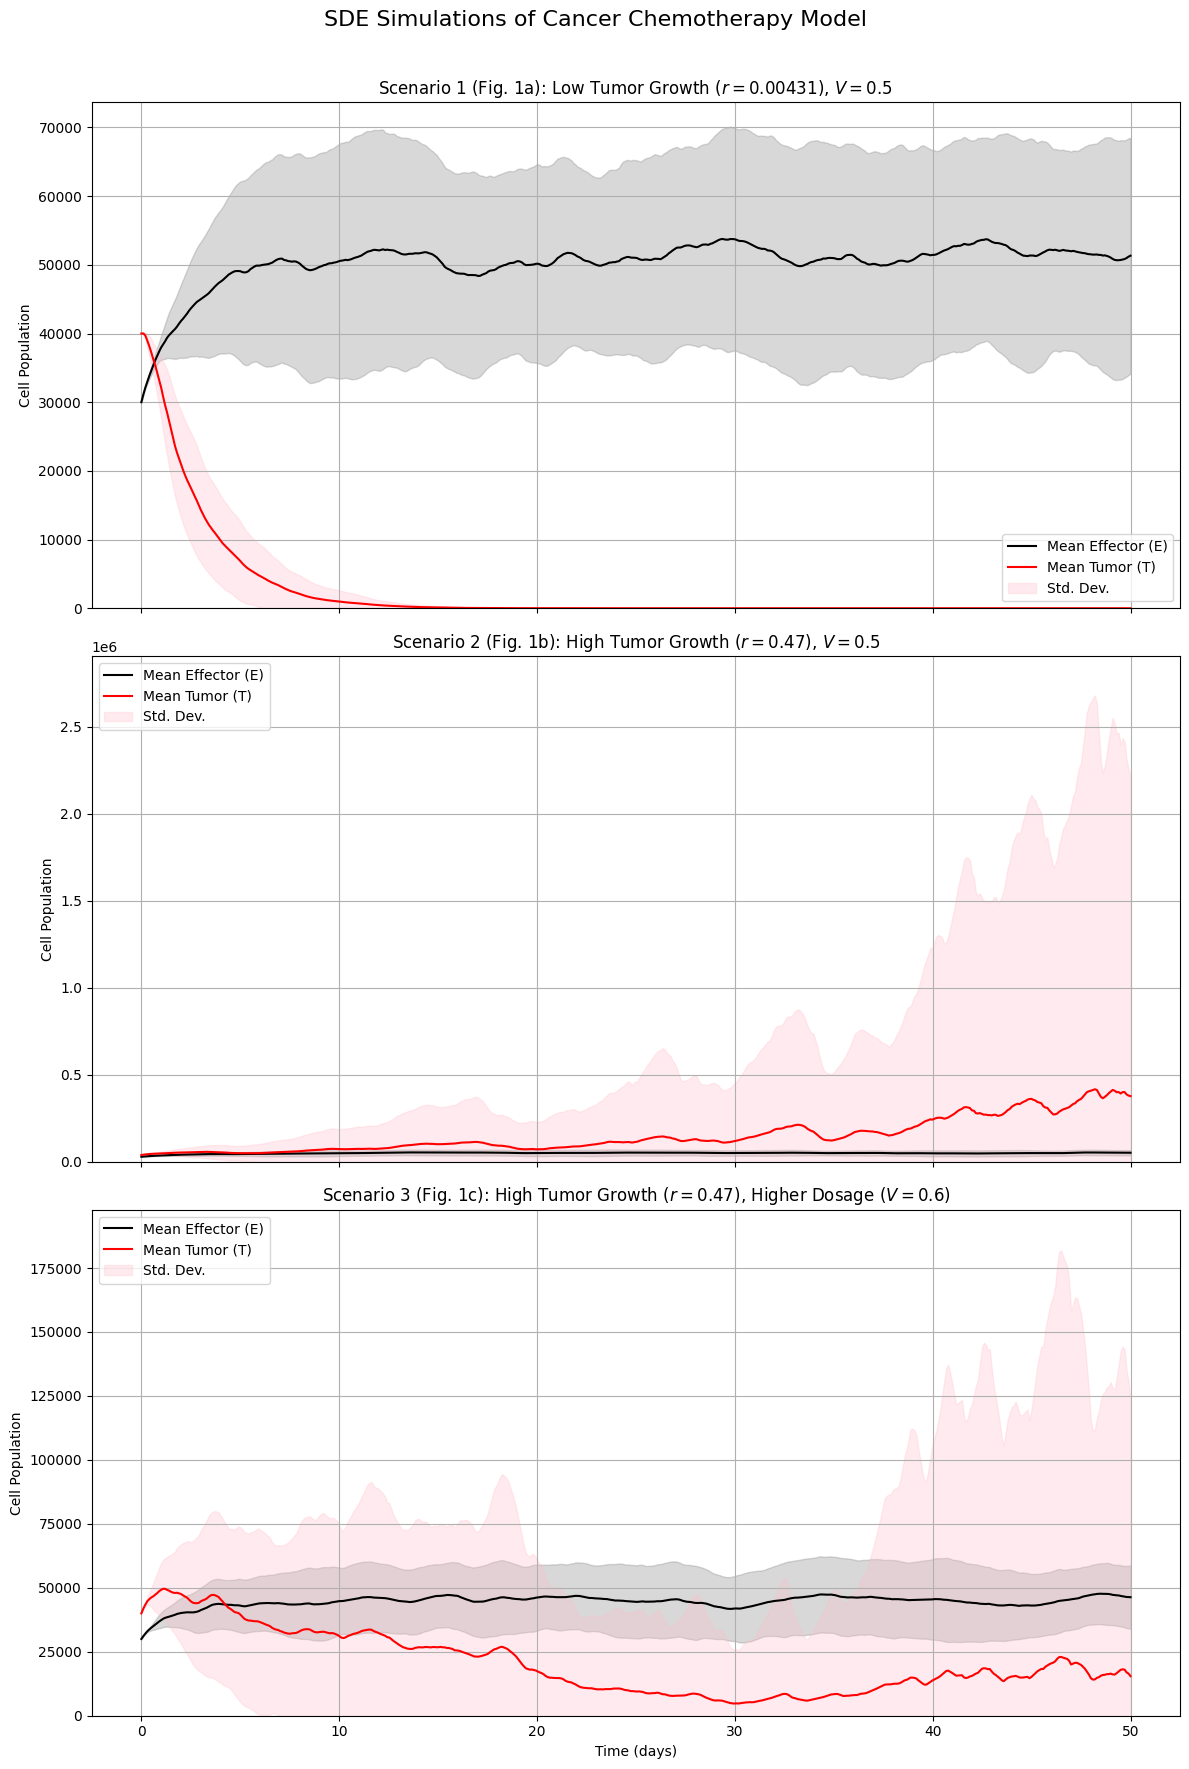

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Define Model Parameters ---
# Parameters are based on Table 1 in the research paper.
params = {
    'p': 0.015,          # Recruitment rate of effector cells (1/day)
    'r': 4.31*(10**(-3)),        # Rate of tumor growth (1/day) -> This will be changed for Sim 2 & 3
    'b': 1.0*(10**(-9)),         # Tumor carrying capacity parameter (1/cells)
    'a': 3.41*(10**(-10)),       # Parameter of cancer cleanup (1/cells)
    'g': 1.05*(10**2),         # Half-saturation for cancer cleanup (cells)
    's': 1.2*(10**4),          # Growth rate of effector cells (cells/day)
    'm': 2.0*(10**(-11)),        # Inactivation rate of effector cells by tumor cells (1/cells.day)
    'mu': 4.12*(10**(-2)),       # Natural death rate of effector cells (1/day)
    'gamma': 0.9,        # Rate of decrease in drug concentration (1/day)
    'h': 2.02*(10**4),         # Steepness coefficient for effector cell recruitment (cells)

    'KE': 0.3,           # Chemotherapy effect on Effector cells
    'KT': 0.8,           # Chemotherapy effect on Tumor cells
}

# --- 2. Define SDE Drift and Diffusion Functions ---

def drift(y, t, p, V_M_func):
    """ The deterministic part of the SDE (the original ODEs). """
    E, T, M = np.maximum(0, y) # Ensure no negative values
    current_V_M = V_M_func(t)
    dE_dt = p['s'] - p['mu'] * E + (p['p'] * E * T) / (p['h'] + T) - p['m'] * E * T - p['KE'] * E * M
    dT_dt = p['r'] * T * (1 - p['b'] * T) - (p['a'] * E * T) / (T + p['g']) - p['KT'] * T * M
    dM_dt = -p['gamma'] * M + current_V_M
    return np.array([dE_dt, dT_dt, dM_dt])

def diffusion(y, t, p, V_M_func):
    """ The stochastic part of the SDE (noise terms). """
    E, T, M = np.maximum(0, y) # Ensure no negative values
    current_V_M = V_M_func(t)
    var_E = p['s'] + p['mu'] * E + (p['p'] * E * T) / (p['h'] + T) + p['m'] * E * T + p['KE'] * E * M
    var_T = abs(p['r'] * T * (1 - p['b'] * T)) + (p['a'] * E * T) / (T + p['g']) + p['KT'] * T * M
    var_M = p['gamma'] * M + current_V_M
    return np.diag([np.sqrt(var_E), np.sqrt(var_T), np.sqrt(var_M)])

# --- 3. SDE Numerical Solver (Euler-Maruyama) ---

def sde_solver(y0, t_points, drift_func, diffusion_func, params, V_M_func):
    """ Solves a system of SDEs using the Euler-Maruyama method. """
    num_vars = len(y0)
    num_steps = len(t_points)
    y_out = np.zeros((num_steps, num_vars))
    y_out[0] = y0
    for i in range(1, num_steps):
        t = t_points[i-1]
        dt = t_points[i] - t
        dW = np.random.normal(0.0, np.sqrt(dt), num_vars)
        drift_term = drift_func(y_out[i-1], t, params, V_M_func)
        diffusion_term = diffusion_func(y_out[i-1], t, params, V_M_func) @ dW
        y_out[i] = y_out[i-1] + drift_term * dt + diffusion_term
        y_out[i] = np.maximum(0, y_out[i]) # Ensure no negative populations
    return y_out

# --- 4. Run All Three Simulations ---

# Common simulation settings
t = np.linspace(0, 50, 500)
initial_conditions = [30000, 40000, 0]
num_simulations = 50 # Number of paths for the ensemble

# --- Scenario 1: Low tumor growth (r=0.00431), V=0.5 ---
params_sim1 = params.copy()
V_M_sim1_func = lambda time: 0.5
ensemble1 = np.array([sde_solver(initial_conditions, t, drift, diffusion, params_sim1, V_M_sim1_func) for _ in range(num_simulations)])
mean1, std1 = np.mean(ensemble1, axis=0), np.std(ensemble1, axis=0)

# [cite_start]--- Scenario 2: High tumor growth (r=0.47), V=0.5 --- [cite: 229]
params_sim2 = params.copy()
params_sim2['r'] = 0.47
V_M_sim2_func = lambda time: 0.5
ensemble2 = np.array([sde_solver(initial_conditions, t, drift, diffusion, params_sim2, V_M_sim2_func) for _ in range(num_simulations)])
mean2, std2 = np.mean(ensemble2, axis=0), np.std(ensemble2, axis=0)

# [cite_start]--- Scenario 3: High tumor growth (r=0.47), V=0.6 --- [cite: 235]
params_sim3 = params.copy()
params_sim3['r'] = 0.47
V_M_sim3_func = lambda time: 0.6
ensemble3 = np.array([sde_solver(initial_conditions, t, drift, diffusion, params_sim3, V_M_sim3_func) for _ in range(num_simulations)])
mean3, std3 = np.mean(ensemble3, axis=0), np.std(ensemble3, axis=0)

# --- 5. Plotting the Results ---

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18), sharex=True)
fig.suptitle('SDE Simulations of Cancer Chemotherapy Model', fontsize=16)

# Plot for Scenario 1
ax1.set_title('Scenario 1 (Fig. 1a): Low Tumor Growth ($r=0.00431$), $V=0.5$')
ax1.plot(t, mean1[:, 0], color='black', label='Mean Effector (E)')
ax1.fill_between(t, mean1[:, 0] - std1[:, 0], mean1[:, 0] + std1[:, 0], color='gray', alpha=0.3)
ax1.plot(t, mean1[:, 1], color='red', label='Mean Tumor (T)')
ax1.fill_between(t, mean1[:, 1] - std1[:, 1], mean1[:, 1] + std1[:, 1], color='pink', alpha=0.3, label='Std. Dev.')
ax1.set_ylabel('Cell Population')
ax1.legend()
ax1.grid(True)
ax1.set_ylim(bottom=0)

# Plot for Scenario 2
ax2.set_title('Scenario 2 (Fig. 1b): High Tumor Growth ($r=0.47$), $V=0.5$')
ax2.plot(t, mean2[:, 0], color='black', label='Mean Effector (E)')
ax2.fill_between(t, mean2[:, 0] - std2[:, 0], mean2[:, 0] + std2[:, 0], color='gray', alpha=0.3)
ax2.plot(t, mean2[:, 1], color='red', label='Mean Tumor (T)')
ax2.fill_between(t, mean2[:, 1] - std2[:, 1], mean2[:, 1] + std2[:, 1], color='pink', alpha=0.3, label='Std. Dev.')
ax2.set_ylabel('Cell Population')
ax2.legend()
ax2.grid(True)
ax2.set_ylim(bottom=0)

# Plot for Scenario 3
ax3.set_title('Scenario 3 (Fig. 1c): High Tumor Growth ($r=0.47$), Higher Dosage ($V=0.6$)')
ax3.plot(t, mean3[:, 0], color='black', label='Mean Effector (E)')
ax3.fill_between(t, mean3[:, 0] - std3[:, 0], mean3[:, 0] + std3[:, 0], color='gray', alpha=0.3)
ax3.plot(t, mean3[:, 1], color='red', label='Mean Tumor (T)')
ax3.fill_between(t, mean3[:, 1] - std3[:, 1], mean3[:, 1] + std3[:, 1], color='pink', alpha=0.3, label='Std. Dev.')
ax3.set_xlabel('Time (days)')
ax3.set_ylabel('Cell Population')
ax3.legend()
ax3.grid(True)
ax3.set_ylim(bottom=0)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

### Including network science

Generating sparse tumor network...
Generating dense tumor network...

--- RUNNING SIMULATIONS FOR SPARSE TUMOR ---


Simulating: 100%|██████████| 100/100 [00:00<00:00, 156.37it/s]



--- RUNNING SIMULATIONS FOR DENSE TUMOR ---


Simulating:  20%|██        | 20/100 [00:00<00:01, 74.61it/s]


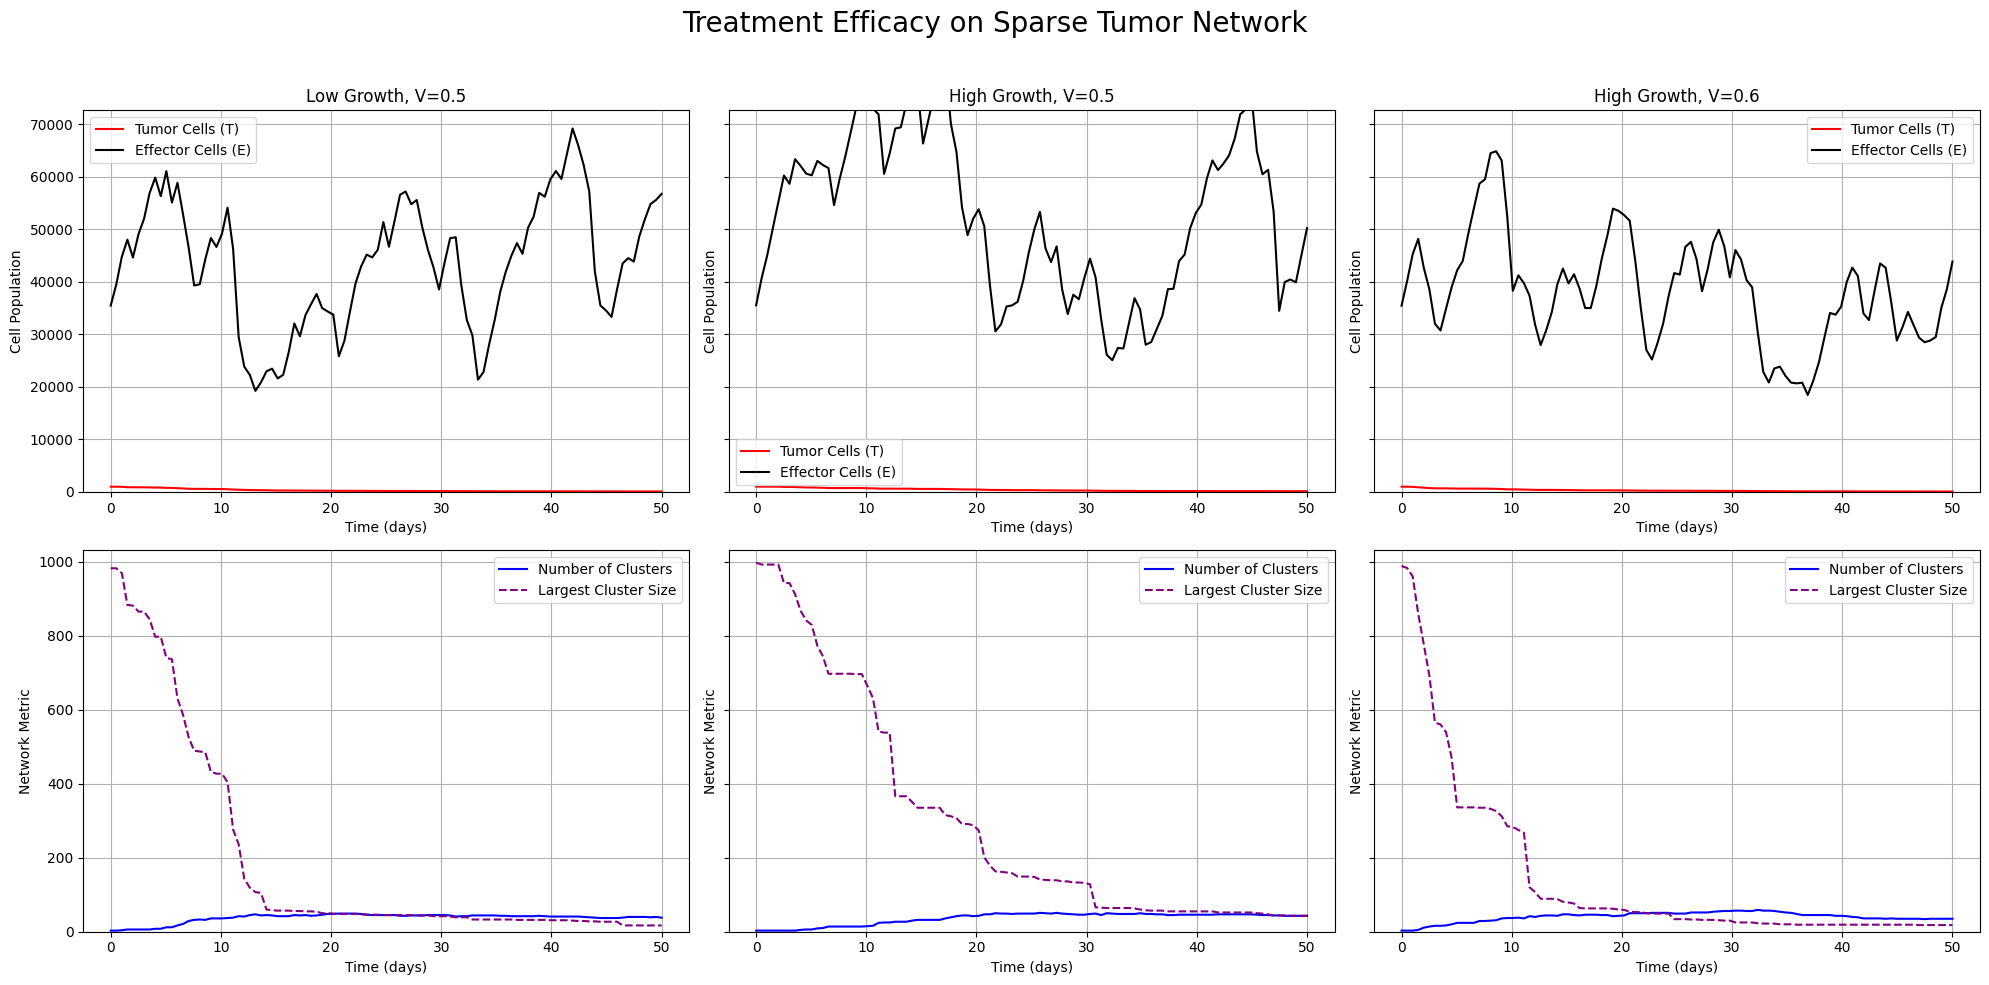

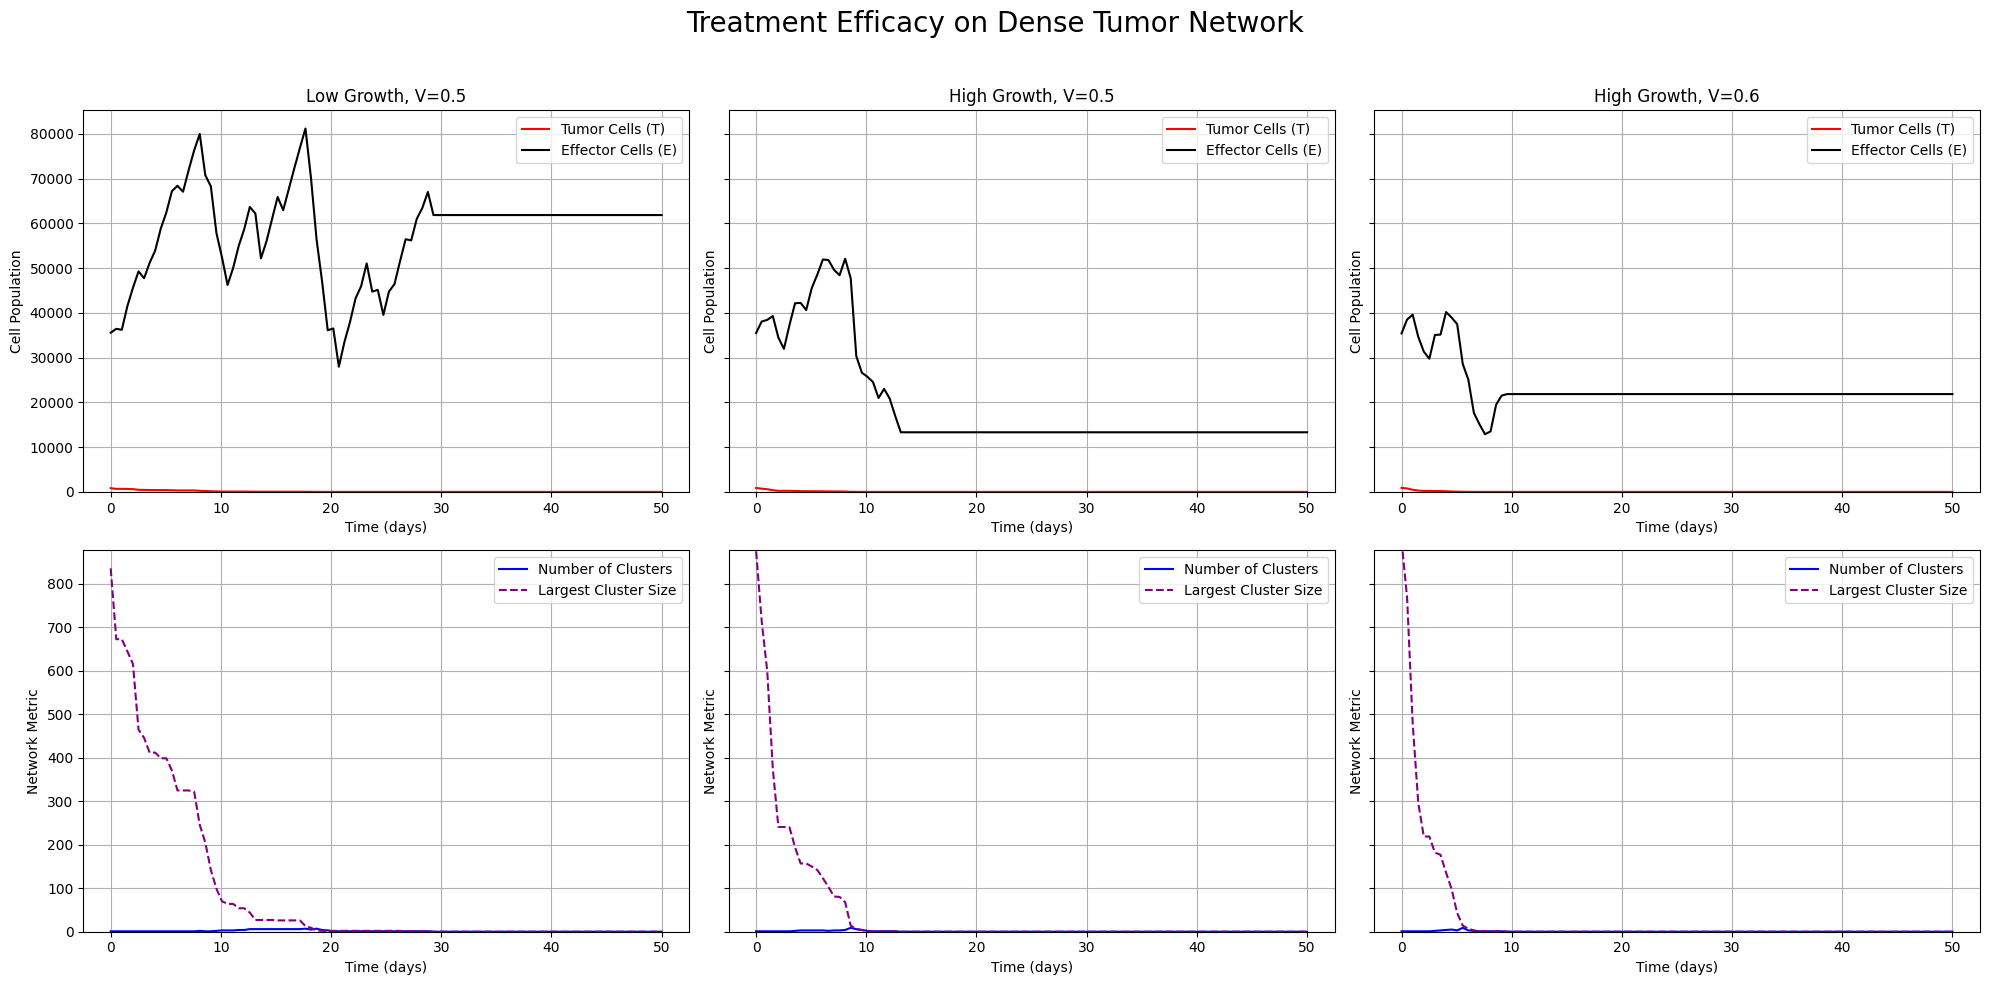

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

# --- 1. NETWORK GENERATION ---
def generate_tumor_network(n_nodes, radius):
    """
    Generates a 2D spatial tumor network.
    - n_nodes: Total number of cells (nodes).
    - radius: Connection radius. A smaller radius creates a sparser, more clustered network.
    """
    G = nx.Graph()

    # --- 1: Add nodes to the graph FIRST ---
    # This was the cause of the error. The graph was empty.
    G.add_nodes_from(range(n_nodes))

    positions = {i: (random.random(), random.random()) for i in range(n_nodes)}
    nx.set_node_attributes(G, positions, 'pos')

    # Pre-calculate node pairs for efficiency
    nodes = list(G.nodes())
    for i in range(len(nodes)):
        for j in range(i + 1, len(nodes)):
            p1 = G.nodes[nodes[i]]['pos']
            p2 = G.nodes[nodes[j]]['pos']
            dist = np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)
            if dist < radius:
                G.add_edge(nodes[i], nodes[j])

    # Initialize all tumor cells as 'alive'
    nx.set_node_attributes(G, True, 'is_alive')

    # Assume a drug source near the node closest to the origin (0,0)
    source_node = min(G.nodes(), key=lambda n: np.linalg.norm(np.array(G.nodes[n]['pos'])))

    # --- 2: Make shortest_path_length robust for disconnected graphs ---
    # This prevents errors if some clusters are unreachable from the source.
    path_lengths = {}
    for n in G.nodes():
        if nx.has_path(G, source_node, n):
            path_lengths[n] = nx.shortest_path_length(G, source=source_node, target=n)
        else:
            path_lengths[n] = float('inf') # Mark unreachable nodes
    nx.set_node_attributes(G, path_lengths, 'path_len')

    return G

# --- 2. CORE SIMULATION ENGINE ---
def run_simulation(G, params, V_M_func, t_points):
    """
    Runs the full network-based SDE simulation for a given tumor graph.
    """
    dt = t_points[1] - t_points[0]

    # --- Initialize state variables and history ---
    E = 30000  # Initial effector cells
    M_total = 0.0 # Initial total drug concentration

    history = {
        'time': t_points,
        'effector_cells': [],
        'tumor_cells': [],
        'l_comp_size': [],
        'num_clusters': []
    }

    # --- Main simulation loop ---
    for t in tqdm(t_points, desc="Simulating"):
        # Get a subgraph of only the currently living tumor cells
        living_nodes = [n for n, d in G.nodes(data=True) if d['is_alive']]
        if not living_nodes: # If no tumor cells are left
            history['effector_cells'].extend([E] * (len(t_points) - len(history['effector_cells'])))
            history['tumor_cells'].extend([0] * (len(t_points) - len(history['tumor_cells'])))
            history['l_comp_size'].extend([0] * (len(t_points) - len(history['l_comp_size'])))
            history['num_clusters'].extend([0] * (len(t_points) - len(history['num_clusters'])))
            break

        T_subgraph = G.subgraph(living_nodes)

        # --- Identify Surface vs. Core Tumor Cells ---
        degrees = dict(T_subgraph.degree())
        avg_degree = np.mean(list(degrees.values())) if degrees else 0
        surface_nodes = [n for n, deg in degrees.items() if deg <= avg_degree]
        T_surface_count = len(surface_nodes)

        # --- Update Global E and M using SDE logic ---
        # Drift (deterministic part)
        dE_dt = params['s'] - params['mu'] * E + (params['p'] * E * T_surface_count) / (params['h'] + T_surface_count) - params['m'] * E * T_surface_count - params['KE'] * E * M_total
        dM_dt = -params['gamma'] * M_total + V_M_func(t)

        # Diffusion (stochastic part)
        var_E = params['s'] + params['mu'] * E + (params['p'] * E * T_surface_count) / (params['h'] + T_surface_count) + params['m'] * E * T_surface_count + params['KE'] * E * M_total
        var_M = params['gamma'] * M_total + V_M_func(t)

        E += dE_dt * dt + np.sqrt(max(0, var_E * dt)) * np.random.normal(0,1)
        M_total += dM_dt * dt + np.sqrt(max(0, var_M * dt)) * np.random.normal(0,1)
        E, M_total = max(0, E), max(0, M_total)

        # --- Update Individual Tumor Nodes Probabilistically ---
        for node in living_nodes:
            # Drug Penetration: Concentration decreases with distance from source
            path_len = G.nodes[node]['path_len']
            local_M = M_total * np.exp(-0.1 * path_len) # 0.1 is a decay factor

            # Immune Attack (only on surface cells)
            if node in surface_nodes:
                # Add a check to prevent division by zero if T_surface_count is 0
                if T_surface_count > 0:
                    immune_kill_rate = (params['a'] * E) / (T_surface_count + params['g'])
                    if random.random() < immune_kill_rate * dt:
                        G.nodes[node]['is_alive'] = False
                        continue

            # Chemo Attack (on all living cells, based on local drug concentration)
            chemo_kill_rate = params['KT'] * local_M
            if random.random() < chemo_kill_rate * dt:
                G.nodes[node]['is_alive'] = False
                continue

        # --- Record metrics for this time step ---
        current_living_nodes = [n for n, d in G.nodes(data=True) if d['is_alive']]
        current_T_subgraph = G.subgraph(current_living_nodes)
        history['effector_cells'].append(E)
        history['tumor_cells'].append(len(current_living_nodes))

        if len(current_living_nodes) > 0:
            history['num_clusters'].append(nx.number_connected_components(current_T_subgraph))
            largest_comp = max(nx.connected_components(current_T_subgraph), key=len)
            history['l_comp_size'].append(len(largest_comp))
        else:
            history['num_clusters'].append(0)
            history['l_comp_size'].append(0)

    return history

# --- 3. ANALYSIS AND PLOTTING ---
def plot_results(results, title):
    """Plots the outcomes of all simulation scenarios."""
    fig, axes = plt.subplots(2, 3, figsize=(20, 10), sharey='row')
    fig.suptitle(title, fontsize=20)

    scenarios = ["Low Growth, V=0.5", "High Growth, V=0.5", "High Growth, V=0.6"]

    for i, scenario_name in enumerate(scenarios):
        # --- Plot 1: Tumor & Effector Cell Counts ---
        ax = axes[0, i]
        res = results[i]
        ax.plot(res['time'], res['tumor_cells'], color='red', label='Tumor Cells (T)')
        ax.plot(res['time'], res['effector_cells'], color='black', label='Effector Cells (E)')
        ax.set_title(scenario_name)
        ax.set_xlabel('Time (days)')
        ax.set_ylabel('Cell Population')
        ax.grid(True)
        ax.legend()
        ax.set_ylim(bottom=0)

        # --- Plot 2: Network Metrics (Clusters) ---
        ax = axes[1, i]
        ax.plot(res['time'], res['num_clusters'], color='blue', label='Number of Clusters')
        ax.plot(res['time'], res['l_comp_size'], color='purple', linestyle='--', label='Largest Cluster Size')
        ax.set_xlabel('Time (days)')
        ax.set_ylabel('Network Metric')
        ax.grid(True)
        ax.legend()
        ax.set_ylim(bottom=0)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# --- 4. MAIN EXPERIMENT SCRIPT ---
if __name__ == '__main__':
    # --- Basic model parameters ---
    base_params = {
        'p': 0.015, 'b': 1e-9, 'a': 3.41e-10, 'g': 1.05e2, 's': 1.2e4,
        'm': 2e-11, 'mu': 4.12e-2, 'gamma': 0.9, 'h': 2.02e4,
        'KT': 0.8, 'KE': 0.3
    }

    # --- Experiment setup ---
    N_CELLS = 1000  # Use a smaller number for faster simulation
    TIME_POINTS = np.linspace(0, 50, 100) # 100 steps

    # --- Generate Tumor Networks ---
    print("Generating sparse tumor network...")
    sparse_tumor_graph = generate_tumor_network(N_CELLS, radius=0.05)
    print("Generating dense tumor network...")
    dense_tumor_graph = generate_tumor_network(N_CELLS, radius=0.15)

    # --- Define Scenarios ---
    scenarios_params = [
        {'r': 4.31e-3, 'V_func': lambda t: 0.5},
        {'r': 0.47, 'V_func': lambda t: 0.5},
        {'r': 0.47, 'V_func': lambda t: 0.6}
    ]

    # --- Run Experiments ---
    sparse_results = []
    dense_results = []

    print("\n--- RUNNING SIMULATIONS FOR SPARSE TUMOR ---")
    for scen in scenarios_params:
        params = base_params.copy()
        params['r'] = scen['r']
        # Use .copy() to avoid modifying the graph during simulation
        result = run_simulation(sparse_tumor_graph.copy(), params, scen['V_func'], TIME_POINTS)
        sparse_results.append(result)

    print("\n--- RUNNING SIMULATIONS FOR DENSE TUMOR ---")
    for scen in scenarios_params:
        params = base_params.copy()
        params['r'] = scen['r']
        result = run_simulation(dense_tumor_graph.copy(), params, scen['V_func'], TIME_POINTS)
        dense_results.append(result)

    # --- Plot Final Results ---
    plot_results(sparse_results, "Treatment Efficacy on Sparse Tumor Network")
    plot_results(dense_results, "Treatment Efficacy on Dense Tumor Network")

**Network similation**

Random Network - random, homogeneous contacts (like mean-field ODE assumption)

BA Network - scale-free, mimics biological heterogeneity (some tumor cells are more connected)

Watts Strogatz - small-world, mixes local and long-range contacts (plausible tissue structure)

Community - tumor sub-clones or compartments with different infection connectivity

Running demo: ER vs BA network extinction probabilities (this may take 1–2 minutes)...


β sweep (erdos_renyi):   0%|          | 0/8 [00:00<?, ?it/s]

β sweep (barabasi_albert):   0%|          | 0/8 [00:00<?, ?it/s]

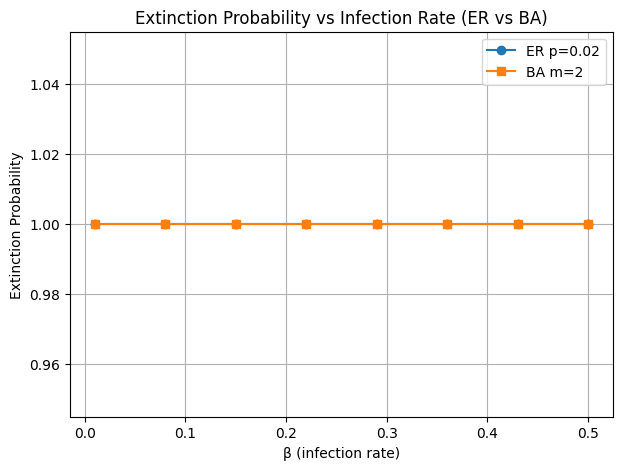

In [ ]:

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigs
from collections import Counter
import random
from tqdm.notebook import tqdm

# 1. NETWORK GENERATION FUNCTIONS

def make_network(kind, N=200, **kwargs):
    """
    Create a contact network between tumor cells.
    kind: 'erdos_renyi', 'barabasi_albert', 'watts_strogatz', 'community'
    """
    if kind == 'erdos_renyi':
        p = kwargs.get('p', 0.02)
        G = nx.erdos_renyi_graph(N, p)
    elif kind == 'barabasi_albert':
        m = kwargs.get('m', 2)
        G = nx.barabasi_albert_graph(N, m)
    elif kind == 'watts_strogatz':
        k = kwargs.get('k', 4)
        p = kwargs.get('p', 0.1)
        G = nx.watts_strogatz_graph(N, k, p)
    elif kind == 'community':
        sizes = kwargs.get('sizes', [int(N/2), int(N/2)])
        p_in = kwargs.get('p_in', 0.05)
        p_out = kwargs.get('p_out', 0.005)
        if len(sizes) == 2:
            probs = [[p_in, p_out],[p_out,p_in]]
            G = nx.stochastic_block_model(sizes, probs)
        else:
            G = nx.connected_caveman_graph(len(sizes), int(N/len(sizes)))
    else:
        raise ValueError("Unknown network kind")

    # Ensure connectedness and relabel nodes to contiguous integers
    if not nx.is_connected(G):
        largest = max(nx.connected_components(G), key=len)
        G = G.subgraph(largest).copy()
    G = nx.convert_node_labels_to_integers(G)
    return G

# spectral radius (largest eigenvalue) quantifies how strongly connected the tumor is
def spectral_radius(G):
    """Compute largest eigenvalue (λ_max) of adjacency matrix."""
    A = nx.to_scipy_sparse_matrix(G, dtype=float)
    vals, _ = eigs(A, k=1, which='LM')
    lam = np.real(vals[0])
    return lam


# 3. STOCHASTIC NETWORK SIMULATION

def simulate_network(G, beta, delta, a1=0.0, initial_infected_frac=0.01,
                     t_max=200, dt=1.0, rng=None):
    """
    Node-level stochastic simulation for tumor–virus spread.
      0 = uninfected tumor cell (Tu)
      1 = infected tumor cell (Ti)
      2 = removed/dead (Td)
    """
    if rng is None:
        rng = np.random.default_rng()

    nodes = list(G.nodes())
    N = len(nodes)
    state = np.zeros(N, dtype=int)

    # Initial infection
    k0 = max(1, int(initial_infected_frac * N))
    seeds = rng.choice(N, size=k0, replace=False)
    state[seeds] = 1

    Tu_hist, Ti_hist, R_hist = [], [], []
    times = np.arange(0, t_max, dt)
    nbrs = [list(G.neighbors(u)) for u in nodes]

    p_inf_val = 1 - np.exp(-beta * dt)
    p_die_val = 1 - np.exp(-delta * dt)
    p_immune_val = 1 - np.exp(-a1 * dt)

    for t in times:
        Tu_hist.append((state == 0).sum() / N)
        Ti_hist.append((state == 1).sum() / N)
        R_hist.append((state == 2).sum() / N)

        if (state == 1).sum() == 0:
            # infection extinct
            for _ in range(int((t_max - t - dt)/dt)):
                Tu_hist.append((state==0).sum()/N)
                Ti_hist.append(0.0)
                R_hist.append((state==2).sum()/N)
            break

        new_state = state.copy()

        # Infection step
        infected_idx = np.where(state == 1)[0]
        for ii in infected_idx:
            for nb in nbrs[ii]:
                if state[nb] == 0 and np.random.random() < p_inf_val:
                    new_state[nb] = 1

        # Death step
        for ii in infected_idx:
            if np.random.random() < p_die_val:
                new_state[ii] = 2

        # Immune clearance
        if a1 > 0:
            susceptible_idx = np.where(state == 0)[0]
            for ii in susceptible_idx:
                if np.random.random() < p_immune_val:
                    new_state[ii] = 2

        state = new_state

    out = {
        "times": np.arange(0, len(Tu_hist)) * dt,
        "Tu": np.array(Tu_hist),
        "Ti": np.array(Ti_hist),
        "R": np.array(R_hist),
    }
    return out


# 4. EXTINCTION PROBABILITY EXPERIMENT

def extinction_probability_experiment(kind, topology_params, beta_list, delta,
                                      trials=100, N=300, **kwargs):
    results = {}
    for beta in tqdm(beta_list, desc=f"β sweep ({kind})"):
        ext_count = 0
        for tr in range(trials):
            G = make_network(kind, N=N, **topology_params)
            sim = simulate_network(G, beta=beta, delta=delta,
                                   initial_infected_frac=kwargs.get('init_frac', 0.01),
                                   t_max=kwargs.get('t_max', 150), dt=kwargs.get('dt', 1.0),
                                   a1=kwargs.get('a1', 0.0))
            if sim["Ti"][-1] == 0.0:
                ext_count += 1
        results[beta] = ext_count / trials
    return results


# 5. DEMO: INLINE PLOT

beta_list = np.linspace(0.01, 0.5, 8)
delta = 0.25
er_params = {"p": 0.02}
ba_params = {"m": 2}

print("Running demo: ER vs BA network extinction probabilities (this may take 1–2 minutes)...")
er_res = extinction_probability_experiment("erdos_renyi", er_params, beta_list, delta, trials=50, N=300)
ba_res = extinction_probability_experiment("barabasi_albert", ba_params, beta_list, delta, trials=50, N=300)

# Inline plot
plt.figure(figsize=(7, 5))
plt.plot(beta_list, [er_res[b] for b in beta_list], marker="o", label="ER p=0.02")
plt.plot(beta_list, [ba_res[b] for b in beta_list], marker="s", label="BA m=2")
plt.xlabel("β (infection rate)")
plt.ylabel("Extinction Probability")
plt.title("Extinction Probability vs Infection Rate (ER vs BA)")
plt.legend()
plt.grid(True)
plt.show()


Inference from the graph - Extinction probablity


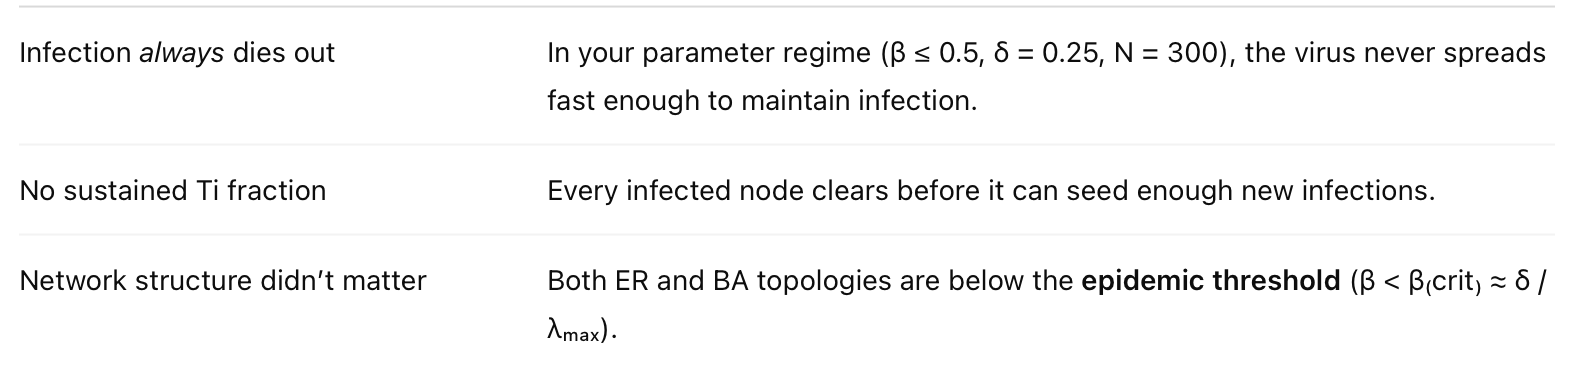

# finalised code

Running Scenario: Low Growth (r=0.00431, V=0.5)


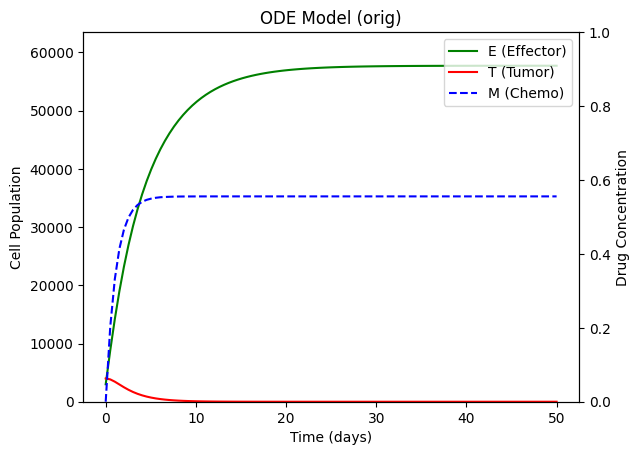

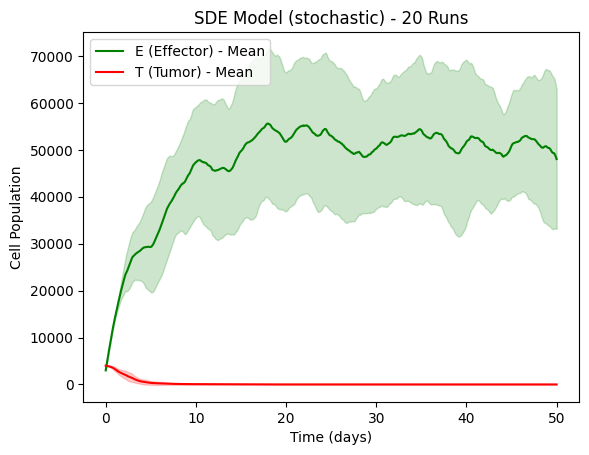

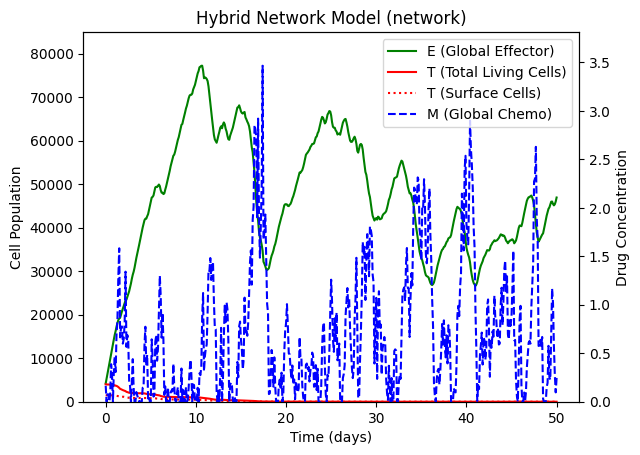

Running Scenario: High Growth (r=0.47, V=0.6)


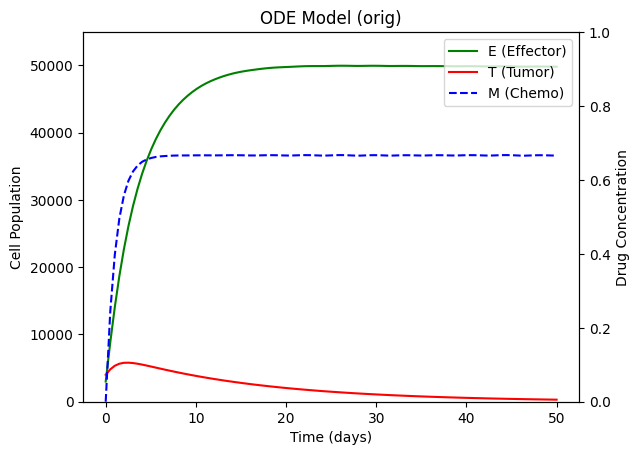

--- High Growth SDE Run ---


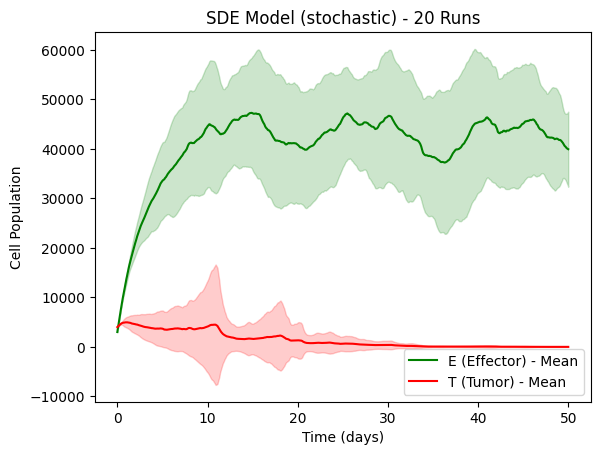

--- High Growth Network Run ---


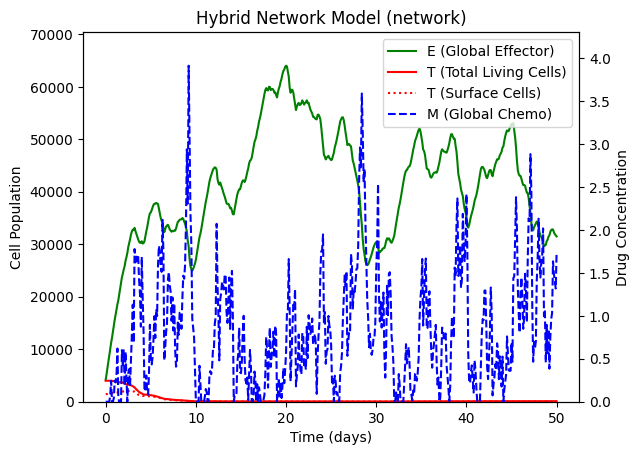

Simulation complete.


In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import networkx as nx
import random

# ==============================================================================
# PARAMETERS AND MODEL 1: 'orig' (ODE)
# ==============================================================================

def get_base_parameters():
    """Returns the baseline parameter dictionary based on Lestari et al."""
    return {
        's': 1.2e4,       # growth rate of effector cells (cells/day)
        'p': 0.015,       # degree of recruitment of E-cells (1/day)
        'h': 2.02e4,      # steepness coeff. of recruitment (cells)
        'm': 2e-11,       # degree of inactivation of E-cells (1/cells.day)
        'mu': 4.12e-2,    # rate of natural demise of E-cells (1/day)
        'r': 4.31e-3,     # rate of tumor growth (1/day)
        'b': 1e-9,        # capacity of tumor cell (1/cells)
        'a': 3.41e-10,    # parameter of cancer cleanup (1/cells)
        'g': 1e5,         # half-saturation for cleanup (cells)
        'gamma': 0.9,     # rate of decrease in chemo (1/day)
        'KE': 0.3,        # Chemo effect on E-cells (assumed)
        'KT': 0.8,        # Chemo effect on T-cells (assumed)
        'V': 0.5,         # Chemo admin rate (Scenario 1)
        'K_cap': 1e9      # Carrying capacity K = 1/b
    }

def ode_model(t, y, p):
    """
    Defines the deterministic ODE system (Lestari et al., System 11).
    Args:
        t (float): Time
        y (list): State vector
        p (dict): Parameter dictionary
    """
    E, T, M = y
    E, T, M = max(0, E), max(0, T), max(0, M)

    dEdt = p['s'] + (p['p'] * E * T) / (p['h'] + T) - p['m'] * E * T - p['mu'] * E - p['KE'] * M * E
    # ---  Used p['KT'] instead of p ---
    dTdt = p['r'] * T * (1 - p['b'] * T) - (p['a'] * E * T) / (p['g'] + T) - p['KT'] * M * T
    dMdt = -p['gamma'] * M + p['V']

    return [dEdt, dTdt, dMdt]

def run_ode_simulation(params, y0, t_span, t_eval):
    """Runs the ODE simulation using solve_ivp."""
    sol = solve_ivp(
        fun=ode_model, t_span=t_span, y0=y0, t_eval=t_eval,
        args=(params,), method='RK45'
    )
    return sol.t, sol.y

# ==============================================================================
# MODEL 2: 'sde' (SDE)
# ==============================================================================

def sde_drift(y, t, p, T_surface=None):
    """
    Defines the drift component (deterministic part) of the SDE.
    Can be adapted for the hybrid model using T_surface.
    """
    E, T, M = y
    E, T, M = max(0, E), max(0, T), max(0, M)

    T_interaction = T_surface if T_surface is not None else T

    # E-cell rates
    s_rate = p['s']
    p_rate = (p['p'] * E * T_interaction) / (p['h'] + T_interaction)
    m_rate = -p['m'] * E * T_interaction
    mu_rate = -p['mu'] * E
    KE_rate = -p['KE'] * M * E

    # T-cell rates
    r_rate = p['r'] * T * (1 - p['b'] * T)
    a_rate = -(p['a'] * E * T) / (p['g'] + T)
    KT_rate = -p['KT'] * M * T

    # M-cell rates
    gamma_rate = -p['gamma'] * M
    V_rate = p['V']

    dEdt = s_rate + p_rate + m_rate + mu_rate + KE_rate
    dTdt = r_rate + a_rate + KT_rate  # Note: This is unused in hybrid model
    dMdt = gamma_rate + V_rate

    return np.array([dEdt, dTdt, dMdt])

def sde_diffusion(y, t, p, T_surface=None):
    """
    Defines the diffusion component (stochastic part) of the SDE.
    Uses the heuristic approximation (sum of absolute rates).
    """
    E, T, M = y
    E, T, M = max(0, E), max(0, T), max(0, M)

    T_interaction = T_surface if T_surface is not None else T

    # E-cell rates
    var_E = (
        abs(p['s']) +
        abs((p['p'] * E * T_interaction) / (p['h'] + T_interaction)) +
        abs(-p['m'] * E * T_interaction) +
        abs(-p['mu'] * E) +
        abs(-p['KE'] * M * E)
    )

    # T-cell rates
    var_T = (
        abs(p['r'] * T * (1 - p['b'] * T)) +
        abs(-(p['a'] * E * T) / (p['g'] + T)) +
        abs(-p['KT'] * M * T)
    )

    # M-cell rates
    var_M = abs(-p['gamma'] * M) + abs(p['V'])

    # --- Return sqrt of variance for SDE ---
    # Clamp to avoid sqrt(0) issues if rates are zero
    var_E = max(1e-10, var_E)
    var_T = max(1e-10, var_T)
    var_M = max(1e-10, var_M)

    return np.diag([np.sqrt(var_E), np.sqrt(var_T), np.sqrt(var_M)])

def sde_solver(y0, t_span, dt, drift_func, diffusion_func, params):
    """
    Solves the SDE system using the Euler-Maruyama method.
    """
    t_start, t_end = t_span
    t_eval = np.arange(t_start, t_end + dt, dt)
    num_vars = len(y0)
    y_out = np.zeros((len(t_eval), num_vars))
    y_out[0, :] = y0

    for i in range(1, len(t_eval)):
        t = t_eval[i-1]
        y_prev = y_out[i-1, :]

        dW = np.random.normal(0.0, np.sqrt(dt), num_vars)
        drift_term = drift_func(y_prev, t, params) * dt
        diffusion_term = diffusion_func(y_prev, t, params) @ dW

        y_next = y_prev + drift_term + diffusion_term
        y_out[i, :] = np.maximum(0, y_next)

    return t_eval, y_out

def run_sde_simulation(params, y0, t_span, dt, num_runs=50):
    """Runs an ensemble of SDE simulations."""
    results = []
    for _ in range(num_runs):
        t, y = sde_solver(y0, t_span, dt, sde_drift, sde_diffusion, params)
        results.append(y)
    return t, np.array(results)

# ==============================================================================
# MODEL 3: 'network' (Hybrid SDE + Agent-Based Network)
# ==============================================================================

def generate_tumor_network(n_nodes, radius):
    """
    Generates a spatial graph for the tumor.
    Nodes have 'pos', 'is_alive', and 'path_len'.
    """
    G = nx.Graph()
    if n_nodes == 0:
        return G

    for i in range(n_nodes):
        G.add_node(i, pos=np.random.rand(2), is_alive=True)

    pos = nx.get_node_attributes(G, 'pos')
    for i in G.nodes():
        for j in range(i + 1, n_nodes):
            dist = np.linalg.norm(pos[i] - pos[j])
            if dist < radius:
                G.add_edge(i, j)

    # Find source node (closest to origin) and compute path lengths
    source_node = min(G.nodes(), key=lambda n: np.linalg.norm(pos[n]))
    nx.set_node_attributes(G, {source_node: True}, name='is_source')

    path_lengths = nx.shortest_path_length(G, source=source_node)

    # Handle disconnected nodes
    for node in G.nodes():
        if node not in path_lengths:
            path_lengths[node] = 999 # Assign a large path length

    nx.set_node_attributes(G, path_lengths, name='path_len')
    return G

class HybridSimulator:
    """
    Manages the state and stepping of the hybrid SDE-network model.
    """
    def __init__(self, y0_globals, G, params, dt):
        self.E = y0_globals[0]
        self.M = y0_globals[1]
        self.G = G
        self.params = params
        self.dt = dt
        self.history = []
        self.current_time = 0

        self.E_idx, self.M_idx = 0, 1 # Indices for a 2-var system

    def get_living_nodes(self):
        """Returns a list of nodes where is_alive is True."""
        return [n for n, data in self.G.nodes(data=True) if data['is_alive']]

    def get_surface_nodes(self, living_nodes):
        """Identifies surface nodes (degree <= average degree)."""
        if not living_nodes:
            return [], {}

        living_subgraph = self.G.subgraph(living_nodes)
        if living_subgraph.number_of_nodes() == 0:
            return [], {}

        degrees = dict(living_subgraph.degree())
        if not degrees:
            return [], {}

        avg_degree = np.mean(list(degrees.values()))

        surface_nodes = [n for n, deg in degrees.items() if deg <= avg_degree]
        return surface_nodes, degrees

    def step_sde_globals(self, T_surface_count):
        """
        Advances E and M one step using Euler-Maruyama.
        Feeds T_surface_count into the drift/diffusion functions.
        """
        y_prev = np.array([self.E, self.M])
        p_ = self.params
        t = self.current_time

        dummy_y = np.array([self.E, 0, self.M]) # E, T_placeholder, M

        full_drift = sde_drift(dummy_y, t, p_, T_surface=T_surface_count)
        full_diff_matrix = sde_diffusion(dummy_y, t, p_, T_surface=T_surface_count)

        # Extract only E (index 0) and M (index 2) components
        drift_vec = np.array([full_drift[0], full_drift[2]])

        # --- Correctly access diagonal elements ---
        diff_vec = np.array([full_diff_matrix[0, 0], full_diff_matrix[2, 2]])
        diff_matrix = np.diag(diff_vec)

        # Euler-Maruyama step for E and M
        dW = np.random.normal(0.0, np.sqrt(self.dt), 2)
        drift_term = drift_vec * self.dt
        diffusion_term = diff_matrix @ dW

        y_next = y_prev + drift_term + diffusion_term
        self.E, self.M = np.maximum(0, y_next)

    def step_tumor_proliferation(self, living_nodes, K_cap):
        """
        Implements agent-based tumor growth using r and b.
        """
        new_nodes_info = []
        N_alive = len(living_nodes)
        p_ = self.params

        prob_divide = p_['r'] * (1 - N_alive / K_cap) * self.dt

        if prob_divide <= 0:
            return

        for node_id in living_nodes:
            if random.random() < prob_divide:
                new_node_id = self.G.number_of_nodes()
                parent_pos = self.G.nodes[node_id]['pos']
                parent_path_len = self.G.nodes[node_id]['path_len']

                new_pos = parent_pos + np.random.randn(2) * 0.01 # Small nudge

                new_nodes_info.append({
                    'id': new_node_id,
                    'pos': new_pos,
                    'parent': node_id,
                    'path_len': parent_path_len + 1 # Simple heuristic
                })

        # --- Add new nodes to the graph ---
        pos_attr = nx.get_node_attributes(self.G, 'pos')
        for info in new_nodes_info:
            self.G.add_node(info['id'], pos=info['pos'], is_alive=True, path_len=info['path_len'])
            pos_attr[info['id']] = info['pos']

            self.G.add_edge(info['id'], info['parent'])

            for neighbor in self.G.neighbors(info['parent']):
                if neighbor not in pos_attr: continue
                dist = np.linalg.norm(info['pos'] - pos_attr[neighbor])
                if 'network_radius' in self.params and dist < self.params['network_radius']:
                    self.G.add_edge(info['id'], neighbor)

    def step_tumor_killing(self, living_nodes, surface_nodes):
        """
        Applies probabilistic killing from Immune (surface)
        and Chemo (gradient) attacks.
        """
        p_ = self.params
        T_surface_count = len(surface_nodes)

        P_kill_E = 0
        if T_surface_count > 0:
            P_kill_E = (p_['a'] * self.E / (p_['g'] + T_surface_count)) * self.dt

        nodes_to_kill = []
        for node_id in living_nodes:

            # 2a. Immune Killing (Surface only)
            if node_id in surface_nodes:
                if random.random() < P_kill_E:
                    nodes_to_kill.append(node_id)
                    continue

            # 2b. Chemo Killing (All nodes, gradient-dependent)
            path_len = self.G.nodes[node_id]['path_len']
            alpha = 0.1 # Chemo decay factor
            M_local = self.M * np.exp(-alpha * path_len)

            P_kill_M = (p_['KT'] * M_local) * self.dt

            if random.random() < P_kill_M:
                nodes_to_kill.append(node_id)

        for node_id in set(nodes_to_kill):
            self.G.nodes[node_id]['is_alive'] = False

    def run_simulation(self, t_end):
        """Main simulation loop."""
        t_eval = np.arange(self.current_time, t_end + self.dt, self.dt)

        T_surface_count = 0
        N_alive = 0

        for t in t_eval:
            self.current_time = t

            living_nodes = self.get_living_nodes()
            N_alive = len(living_nodes)

            if N_alive == 0:
                T_surface_count = 0
                self.step_sde_globals(T_surface_count)
            else:
                surface_nodes, _ = self.get_surface_nodes(living_nodes)
                T_surface_count = len(surface_nodes)

                # 1. Update global E and M
                self.step_sde_globals(T_surface_count)

                # 2. Apply tumor killing
                self.step_tumor_killing(living_nodes, surface_nodes)

                # 3. Apply tumor proliferation
                living_nodes_after_kill = self.get_living_nodes()
                self.step_tumor_proliferation(living_nodes_after_kill, self.params['K_cap'])

            # Record history
            # --- Added history recording ---
            self.history.append([t, self.E, N_alive, self.M, T_surface_count])

        return np.array(self.history)

# ==============================================================================
# VISUALIZATION AND MAIN EXECUTION
# ==============================================================================

def plot_ode_results(t, y):
    E, T, M = y
    fig, ax1 = plt.subplots()
    ax1.set_xlabel('Time (days)')
    ax1.set_ylabel('Cell Population')
    ax1.plot(t, E, 'g-', label='E (Effector)')
    ax1.plot(t, T, 'r-', label='T (Tumor)')
    ax1.set_ylim(0, max(1, np.max(E), np.max(T)) * 1.1)

    ax2 = ax1.twinx()
    ax2.set_ylabel('Drug Concentration')
    ax2.plot(t, M, 'b--', label='M (Chemo)')
    ax2.set_ylim(0, max(1, np.max(M) * 1.1))

    fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
    plt.title('ODE Model (orig)')
    plt.show()

def plot_sde_ensemble(t, results):
    E_runs = results[:, :, 0]
    T_runs = results[:, :, 1]
    M_runs = results[:, :, 2]

    E_mean, E_std = np.mean(E_runs, axis=0), np.std(E_runs, axis=0)
    T_mean, T_std = np.mean(T_runs, axis=0), np.std(T_runs, axis=0)

    fig, ax = plt.subplots()
    ax.set_xlabel('Time (days)')
    ax.set_ylabel('Cell Population')

    ax.plot(t, E_mean, 'g-', label='E (Effector) - Mean')
    ax.plot(t, T_mean, 'r-', label='T (Tumor) - Mean')

    ax.fill_between(t, E_mean - E_std, E_mean + E_std, color='g', alpha=0.2)
    ax.fill_between(t, T_mean - T_std, T_mean + T_std, color='r', alpha=0.2)

    plt.legend()
    plt.title(f'SDE Model (stochastic) - {len(results)} Runs')
    plt.show()

def plot_hybrid_timeseries(history):
    if history.size == 0:
        print("Hybrid simulation history is empty.")
        return

    t, E, N_alive, M, T_surface = history.T

    fig, ax1 = plt.subplots()
    ax1.set_xlabel('Time (days)')
    ax1.set_ylabel('Cell Population')
    ax1.plot(t, E, 'g-', label='E (Global Effector)')
    ax1.plot(t, N_alive, 'r-', label='T (Total Living Cells)')
    ax1.plot(t, T_surface, 'r:', label='T (Surface Cells)')
    ax1.set_ylim(0, max(1, np.max(E), np.max(N_alive)) * 1.1)

    ax2 = ax1.twinx()
    ax2.set_ylabel('Drug Concentration')
    ax2.plot(t, M, 'b--', label='M (Global Chemo)')
    ax2.set_ylim(0, max(1, np.max(M) * 1.1))

    fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
    plt.title('Hybrid Network Model (network)')
    plt.show()

if __name__ == "__main__":
    # --- Shared Simulation Parameters ---
    y0_E = 3000 #30000
    y0_T = 4000 #40000                          --------- CHANGE
    y0_M = 0
    # ---  Initialized state vector ---
    y0_ode_sde = [y0_E, y0_T, y0_M]

    t_span = (0, 50)
    t_eval_ode = np.linspace(t_span[0], t_span[1], 100)
    dt_sde_net = 0.1 # Time step for stochastic models

    # --- Scenario: Low growth (Fig 1a) ---
    print("Running Scenario: Low Growth (r=0.00431, V=0.5)")
    params_low_g = get_base_parameters()
    params_low_g['r'] = 4.31e-3
    params_low_g['V'] = 0.5

    # 1. Run ODE Model
    t_ode, y_ode = run_ode_simulation(params_low_g, y0_ode_sde, t_span, t_eval_ode)
    plot_ode_results(t_ode, y_ode)

    # 2. Run SDE Model
    t_sde, y_sde_runs = run_sde_simulation(params_low_g, y0_ode_sde, t_span, dt_sde_net, num_runs=20)
    plot_sde_ensemble(t_sde, y_sde_runs)

    # 3. Run Network Model
    params_net = params_low_g.copy()
    params_net['network_radius'] = 0.15 # Controls network density

    G = generate_tumor_network(n_nodes=y0_T, radius=params_net['network_radius'])
    y0_globals_net = [y0_E, y0_M]

    simulator = HybridSimulator(y0_globals_net, G, params_net, dt_sde_net)
    history = simulator.run_simulation(t_span[1])
    plot_hybrid_timeseries(history)

    # --- Scenario: High growth (Fig 1b/1c) ---
    print("Running Scenario: High Growth (r=0.47, V=0.6)")
    params_high_g = get_base_parameters()
    params_high_g['r'] = 0.47
    params_high_g['V'] = 0.6 # From Fig 1c
    params_high_g['K_cap'] = 1 / params_high_g['b']

    # 1. Run ODE Model
    t_ode_hg, y_ode_hg = run_ode_simulation(params_high_g, y0_ode_sde, t_span, t_eval_ode)
    plot_ode_results(t_ode_hg, y_ode_hg)

    # ... SDE and Network runs for this scenario would follow the same pattern...
    print("--- High Growth SDE Run ---")
    t_sde_hg, y_sde_runs_hg = run_sde_simulation(params_high_g, y0_ode_sde, t_span, dt_sde_net, num_runs=20)
    plot_sde_ensemble(t_sde_hg, y_sde_runs_hg)

    print("--- High Growth Network Run ---")
    params_net_hg = params_high_g.copy()
    params_net_hg['network_radius'] = 0.15

    G_hg = generate_tumor_network(n_nodes=y0_T, radius=params_net_hg['network_radius'])

    simulator_hg = HybridSimulator(y0_globals_net, G_hg, params_net_hg, dt_sde_net)
    history_hg = simulator_hg.run_simulation(t_span[1])
    plot_hybrid_timeseries(history_hg)

    print("Simulation complete.")